In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
films = pd.read_pickle('data/films_clean_data.pkl')

In [3]:
fgenres = pd.read_pickle('data/films_genre_data.pkl')

In [4]:
films.head()

,Title,Director,IMDb_rating,Genre,Duration_min,Release_year,Actor1,Actor2
0,Top Gun: Maverick,JosephKosinski,8.6,"Action,Drama",130,2022,TomCruise,JenniferConnelly
1,Everything Everywhere All at Once,"DanKwan,",8.3,"Action,Adventure,Comedy",139,2022,MichelleYeoh,StephanieHsu
2,The Batman,MattReeves,7.9,"Action,Crime,Drama",176,2022,RobertPattinson,ZoëKravitz
3,Jurassic Park,StevenSpielberg,8.2,"Action,Adventure,Sci-Fi",127,1993,SamNeill,LauraDern
4,The Godfather,FrancisFordCoppola,9.2,"Crime,Drama",175,1972,MarlonBrando,AlPacino


In [5]:
fgenres.head()

,Title,Director,IMDb_rating,Genre,Duration_min,Release_year,Actor1,Actor2
0,Top Gun: Maverick,JosephKosinski,8.6,Action,130,2022,TomCruise,JenniferConnelly
0,Top Gun: Maverick,JosephKosinski,8.6,Drama,130,2022,TomCruise,JenniferConnelly
1,Everything Everywhere All at Once,"DanKwan,",8.3,Action,139,2022,MichelleYeoh,StephanieHsu
1,Everything Everywhere All at Once,"DanKwan,",8.3,Adventure,139,2022,MichelleYeoh,StephanieHsu
1,Everything Everywhere All at Once,"DanKwan,",8.3,Comedy,139,2022,MichelleYeoh,StephanieHsu


In [6]:
films.shape, fgenres.shape

((1000, 8), (2539, 8))

In [16]:
genre_count = fgenres['Genre'].value_counts(ascending = True)
genre_count

Genre
Musical       16
Sport         16
Western       20
Film-Noir     22
Music         35
Horror        37
War           49
Family        50
History       51
Fantasy       62
Sci-Fi        69
Animation     83
Mystery       99
Biography    107
Romance      127
Thriller     130
Adventure    191
Action       202
Crime        206
Comedy       237
Drama        730
Name: count, dtype: int64

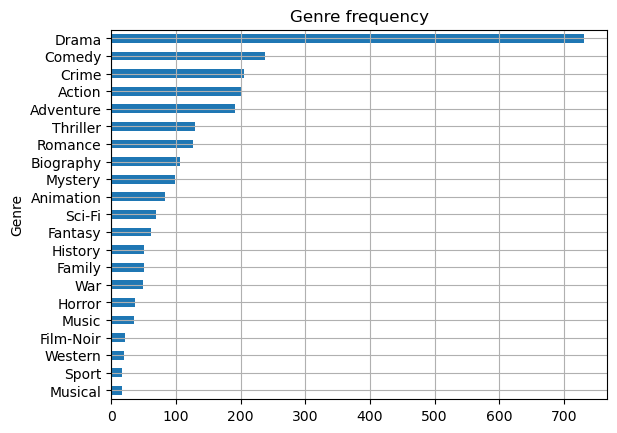

In [20]:
genre_count.plot(grid=True, kind='barh', title='Genre frequency')
plt.show()

In [9]:
fgenres.groupby(['Genre'])['IMDb_rating'].mean().sort_values(ascending=False)

Genre
War          8.051020
Western      8.030000
Mystery      7.993939
Film-Noir    7.986364
Crime        7.981068
Sci-Fi       7.973913
Drama        7.971507
Biography    7.967290
Adventure    7.965969
Action       7.962871
Sport        7.962500
Fantasy      7.948387
Family       7.940000
Romance      7.934646
Animation    7.927711
Musical      7.925000
History      7.921569
Thriller     7.920000
Music        7.911429
Comedy       7.905485
Horror       7.848649
Name: IMDb_rating, dtype: float64

In [31]:
df1 = fgenres.groupby('Genre', as_index=False)['IMDb_rating'].mean().sort_values('IMDb_rating', ascending=False).reset_index(drop=True) \
    .rename(columns = {'IMDb_rating' : 'Mean_rating'})
df1

,Genre,Mean_rating
0,War,8.051020
1,Western,8.030000
2,Mystery,7.993939
3,Film-Noir,7.986364
4,Crime,7.981068
5,Sci-Fi,7.973913
6,Drama,7.971507
7,Biography,7.967290
8,Adventure,7.965969
9,Action,7.962871


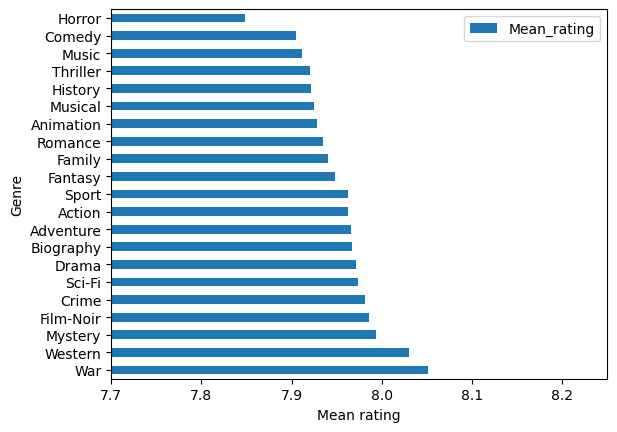

In [33]:
df1.plot(kind = 'barh', 
         x='Genre', 
         y='Mean_rating', 
         xlim=(7.7, 8.25),
        xlabel='Mean rating')
plt.show()



calculate the mean rating per each actor

In [16]:
fgenres['Actor1'].value_counts().reset_index().head(15)

,Actor1,count
0,TomHanks,32
1,HumphreyBogart,29
2,AlPacino,25
3,RobertDeNiro,24
4,LeonardoDiCaprio,24
5,AamirKhan,23
6,ChristianBale,22
7,JamesStewart,20
8,ToshirôMifune,19
9,CharlesChaplin,18


In [19]:
fgenres['Actor1' == 'TomHanks'].value_counts()

KeyError: False

In [24]:
(fgenres['Actor1'] == 'BradPitt').sum()

10

In [25]:
fgenres[fgenres['Actor1'] == 'BradPitt'].value_counts()

Title                                Director          IMDb_rating  Genre      Duration_min  Release_year  Actor1    Actor2       
Fight Club                           DavidFincher      8.8          Drama      139           1999          BradPitt  EdwardNorton     1
Inglourious Basterds                 QuentinTarantino  8.3          Adventure  153           2009          BradPitt  DianeKruger      1
                                                                    Drama      153           2009          BradPitt  DianeKruger      1
                                                                    War        153           2009          BradPitt  DianeKruger      1
Moneyball                            BennettMiller     7.6          Biography  133           2011          BradPitt  RobinWright      1
                                                                    Drama      133           2011          BradPitt  RobinWright      1
                                                     

In [17]:
fgenres['Actor2'].value_counts().reset_index().head(15)

,Actor2,count
0,EmmaWatson,16
1,MattDamon,15
2,TonyChiu-WaiLeung,11
3,IanMcKellen,11
4,KateWinslet,10
5,RobertRedford,9
6,IngridBergman,9
7,TimAllen,9
8,JulieDelpy,9
9,ChristopherLloyd,9


In [35]:
fgenres['Actor1'].value_counts().reset_index()

,Actor1,count
0,TomHanks,32
1,HumphreyBogart,29
2,AlPacino,25
3,RobertDeNiro,24
4,LeonardoDiCaprio,24
...,...,...
648,KatharineHepburn,1
649,YalitzaAparicio,1
650,DonaldSutherland,1
651,FayeDunaway,1


In [85]:
actors1 = fgenres.groupby('Actor1')['IMDb_rating'].agg(['mean', 'count']).reset_index().sort_values('mean', ascending=False)
#actors[actors['Actor1'].isin(['RobertDeNiro','LeonardoDiCaprio'])]
actors1.query('count >= 10').reset_index(drop=True)

,Actor1,mean,count
0,CharlesChaplin,8.333333,18
1,ToshirôMifune,8.215789,19
2,RobertDowneyJr.,8.175000,12
3,JamesStewart,8.175000,20
4,LeonardoDiCaprio,8.175000,24
5,AamirKhan,8.139130,23
6,ChristianBale,8.118182,22
7,WilliamHolden,8.100000,11
8,RobertDeNiro,8.095833,24
9,AyushmannKhurrana,8.080000,10


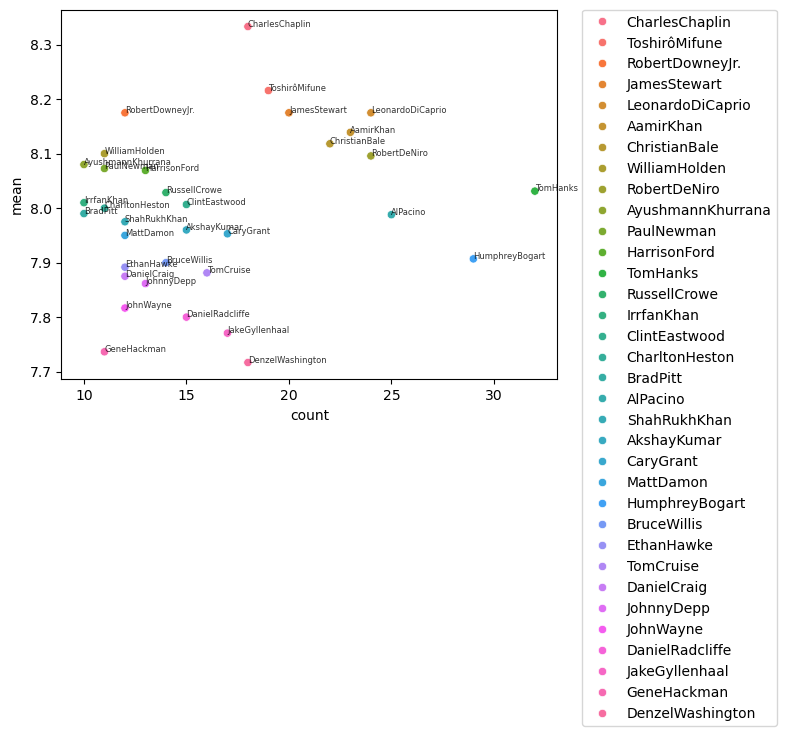

In [86]:
ax = sns.scatterplot(x='count',
               y='mean',
               hue='Actor1',
               data = actors1.query('count >= 10').reset_index(drop=True))
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
for i, row in actors1.query('count >= 10').reset_index(drop=True).iterrows():
    ax.text(
        row["count"],
        row["mean"],
        row["Actor1"],   # label based on hue
        fontsize=6,
        alpha=0.8)
plt.show()

In [61]:
actors.dtypes

Actor1     object
mean      float64
count       int64
dtype: object

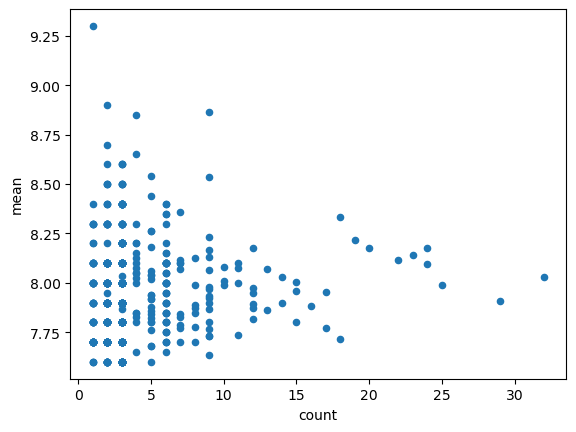

In [43]:
fgenres.groupby('Actor1')['IMDb_rating'].agg(['mean', 'count']).reset_index().sort_values('mean', ascending=False) \
.plot(kind='scatter', 
     x = 'count',
     y = 'mean')
plt.show()

In [87]:
actors2 = fgenres.groupby('Actor2')['IMDb_rating'].agg(['mean', 'count']).reset_index().sort_values('mean', ascending=False)
actors2.query('count >= 10').reset_index(drop=True)

,Actor2,mean,count
0,IanMcKellen,8.372727,11
1,MattDamon,8.066667,15
2,KateWinslet,7.920000,10
3,EmmaWatson,7.862500,16
4,TonyChiu-WaiLeung,7.836364,11


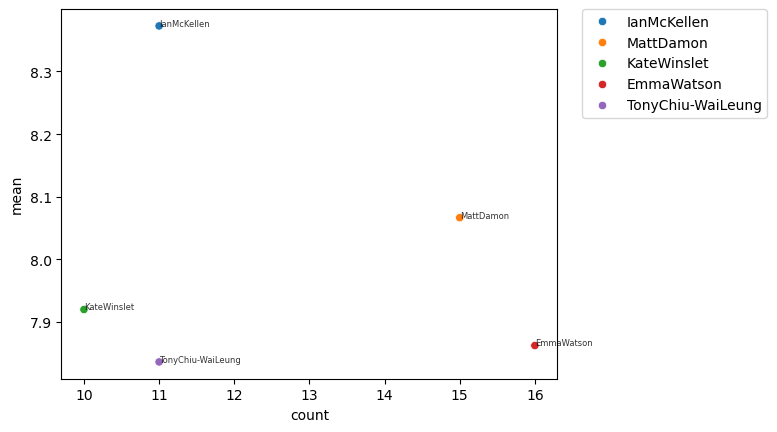

In [88]:
ax2 = sns.scatterplot(x='count',
               y='mean',
               hue='Actor2',
               data = actors2.query('count >= 10').reset_index(drop=True))
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
for i, row in actors2.query('count >= 10').reset_index(drop=True).iterrows():
    ax2.text(
        row["count"],
        row["mean"],
        row["Actor2"],   # label based on hue
        fontsize=6,
        alpha=0.8)
plt.show()

In [89]:
actors1

,Actor1,mean,count
590,TimRobbins,9.300000,1
326,JohnTravolta,8.900000,2
176,ElijahWood,8.866667,9
572,Suriya,8.850000,4
345,KeanuReeves,8.700000,2
...,...,...,...
327,JohnTurturro,7.600000,3
46,AshtonKutcher,7.600000,3
382,LuisTosar,7.600000,3
342,KarlheinzBöhm,7.600000,3


In [95]:
actors2[actors2['Actor2'] == 'KeanuReeves']

,Actor2,mean,count


In [99]:
actors1[actors1['Actor1'] == 'IanMcKellen']


,Actor1,mean,count
264,IanMcKellen,7.8,2
